# LTR Example Machine Learning


# Importación de Librerías

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#import seaborn as sns; sns.set() 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lectura de Archivo

In [3]:
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None


filename = '/content/drive/MyDrive/GitHub/BioNotebooks/Scripting/Programming/LTR-COD2.csv'
training_data = pd.read_csv(filename,delimiter=',',dtype='str')
training_data

,Label,B1,B2,B3,B4,B5,B6,B7,B8,B9,...,B15991,B15992,B15993,B15994,B15995,B15996,B15997,B15998,B15999,B16000
0,0,0.2,0.8,0.2,0.2,0.1,0.1,0.8,0.1,0.2,...,1,1,1,1,1,1,1,1,1,1
1,5,0.2,0.8,0.2,0.2,0.8,0.8,0.8,0.8,0.2,...,1,1,1,1,1,1,1,1,1,1
2,5,0.2,0.8,0.2,0.1,0.8,0.8,0.8,0.8,0.2,...,1,1,1,1,1,1,1,1,1,1
3,1,0.2,0.8,0.2,0.1,0.1,0.8,0.1,0.1,0.1,...,1,1,1,1,1,1,1,1,1,1
4,2,0.2,0.8,0.1,0.1,0.1,0.9,0.9,0.8,0.8,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,10,0.2,0.8,0.2,0.2,0.8,0.9,0.8,0.8,0.1,...,1,1,1,1,1,1,1,1,1,1
1018,10,0.2,0.8,0.2,0.2,0.8,0.9,0.8,0.8,0.1,...,1,1,1,1,1,1,1,1,1,1
1019,10,0.2,0.8,0.9,0.2,0.9,0.1,0.2,0.8,0.2,...,1,1,1,1,1,1,1,1,1,1
1020,10,0.2,0.8,0.2,0.9,0.1,0.1,0.8,0.8,0.8,...,1,1,1,1,1,1,1,1,1,1


# Estadísticas Básicas de los datos de entrada

In [4]:
training_data.describe()

,Label,B1,B2,B3,B4,B5,B6,B7,B8,B9,...,B15991,B15992,B15993,B15994,B15995,B15996,B15997,B15998,B15999,B16000
count,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,...,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022
unique,14,4,4,4,4,4,4,4,4,4,...,1,1,1,1,1,1,1,1,1,1
top,0,0.2,0.8,0.2,0.2,0.8,0.1,0.8,0.1,0.1,...,1,1,1,1,1,1,1,1,1,1
freq,73,902,934,628,663,486,384,466,408,292,...,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022


# Separación de clase y características

In [5]:
type(training_data)

pandas.core.frame.DataFrame

In [6]:
labels = training_data['Label'].values
features= training_data.drop(['Label'], axis=1)

In [7]:
labels.astype('int').min()

0

In [8]:
features

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,...,B15991,B15992,B15993,B15994,B15995,B15996,B15997,B15998,B15999,B16000
0,0.2,0.8,0.2,0.2,0.1,0.1,0.8,0.1,0.2,0.2,...,1,1,1,1,1,1,1,1,1,1
1,0.2,0.8,0.2,0.2,0.8,0.8,0.8,0.8,0.2,0.1,...,1,1,1,1,1,1,1,1,1,1
2,0.2,0.8,0.2,0.1,0.8,0.8,0.8,0.8,0.2,0.1,...,1,1,1,1,1,1,1,1,1,1
3,0.2,0.8,0.2,0.1,0.1,0.8,0.1,0.1,0.1,0.1,...,1,1,1,1,1,1,1,1,1,1
4,0.2,0.8,0.1,0.1,0.1,0.9,0.9,0.8,0.8,0.9,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,0.2,0.8,0.2,0.2,0.8,0.9,0.8,0.8,0.1,0.9,...,1,1,1,1,1,1,1,1,1,1
1018,0.2,0.8,0.2,0.2,0.8,0.9,0.8,0.8,0.1,0.9,...,1,1,1,1,1,1,1,1,1,1
1019,0.2,0.8,0.9,0.2,0.9,0.1,0.2,0.8,0.2,0.1,...,1,1,1,1,1,1,1,1,1,1
1020,0.2,0.8,0.2,0.9,0.1,0.1,0.8,0.8,0.8,0.9,...,1,1,1,1,1,1,1,1,1,1


# Imputación de datos (de ser necesario!!!)

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(features)
features = imputer.transform(features)
features

array([[0.2, 0.8, 0.2, ..., 1. , 1. , 1. ],
       [0.2, 0.8, 0.2, ..., 1. , 1. , 1. ],
       [0.2, 0.8, 0.2, ..., 1. , 1. , 1. ],
       ...,
       [0.2, 0.8, 0.9, ..., 1. , 1. , 1. ],
       [0.2, 0.8, 0.2, ..., 1. , 1. , 1. ],
       [0.2, 0.8, 0.2, ..., 1. , 1. , 1. ]])

# Descomposición en componentes principales (de ser necesario!!!)

In [10]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=100)
pca.fit(features)
features_PCA = pca.transform(features)
features_PCA

array([[-14.3195547 ,  -4.16508747,   6.12727678, ...,   0.20346024,
         -1.39003483,  -0.04090562],
       [ 17.85192895,   0.88594474,  -9.06558376, ...,   0.02724008,
          0.71641813,  -0.13531124],
       [ 17.46624419,   0.84421924,  -8.76113465, ...,  -1.02535469,
         -0.66494894,  -0.51622273],
       ...,
       [ -5.45025703,  -6.44378663,  -2.82181471, ...,   1.26322191,
          0.77278623,   1.06021517],
       [-10.48460584,  -5.72857211,   1.95784055, ...,  -0.39786913,
          0.08111815,  -0.53702617],
       [-11.69188328,  -5.44258929,   3.15429404, ...,  -0.76171949,
         -3.61361771,   2.89403841]])

In [12]:
features.shape, features_PCA.shape

((1022, 16000), (1022, 100))

# Escalamiento del vector de características (de ser necesario!!!)

In [14]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(features)
features_scaler = scaler.transform(features)
#desde el PCA
scaler = preprocessing.StandardScaler().fit(features_PCA)
features_scaler_PCA = scaler.transform(features_PCA)

# Segmentación de los datos para entrenamiento y pruebas

In [15]:
from sklearn.model_selection import train_test_split
validation_size = 0.2
seed = 0
X_train, X_validation, Y_train, Y_validation = train_test_split(features_PCA, labels, test_size=validation_size, random_state=seed)

In [16]:
X_train.shape,Y_train.shape

((817, 100), (817,))

In [17]:
X_train[0 :]

array([[-1.51985947e+01, -2.18993149e+00,  5.29367978e+00, ...,
         2.03757691e-01, -1.99190527e-01,  2.10801948e-01],
       [ 2.39813047e+01,  9.29755217e+00,  3.27688262e-01, ...,
         9.00215711e+00,  3.81228776e+00, -2.44016082e+00],
       [-1.48171347e+01, -2.51233920e+00,  4.88647923e+00, ...,
        -4.50589494e-01, -3.95389412e-01,  2.99180481e-01],
       ...,
       [-3.97253859e+00, -1.08314185e+01, -3.59925072e-01, ...,
         1.80110152e-01, -1.18060072e-01, -2.44364594e-01],
       [ 3.03880429e+01,  5.55081615e+00,  2.97053751e+00, ...,
         2.01749515e+00, -4.76203606e-01, -1.78645662e+00],
       [-2.40425406e+01,  1.96474245e+01, -6.41991651e+00, ...,
        -6.56539212e-01,  2.10761187e-01, -1.94735626e-02]])

# 1. Algoritmo de KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
predictions = KNN.predict(X_validation)

# Resultados

In [19]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

def resultados(Y_validation,predictions):
    conf = confusion_matrix(Y_validation, predictions)
    print ('Flow Pattern classification accuracy = %f' % accuracy(conf))

    print ('Accuracy:', accuracy_score(Y_validation, predictions))
    print ('F1 score:', f1_score(Y_validation, predictions,average='weighted'))
    print ('Recall:', recall_score(Y_validation, predictions,
                              average='weighted'))
    print ('Precision:', precision_score(Y_validation, predictions,
                                    average='weighted'))
    print ('\n clasification report:\n', classification_report(Y_validation, predictions))
    print ('\n confussion matrix:\n',confusion_matrix(Y_validation, predictions))

In [20]:
resultados(Y_validation,predictions)

Flow Pattern classification accuracy = 0.409756
Accuracy: 0.4097560975609756
F1 score: 0.4106779230618726
Recall: 0.4097560975609756
Precision: 0.4517595900034925

 clasification report:
               precision    recall  f1-score   support

           0       0.38      0.57      0.46        14
           1       0.18      0.40      0.25        10
          10       0.82      0.56      0.67        16
          11       0.75      1.00      0.86        12
          12       0.40      0.53      0.46        15
          13       0.43      0.27      0.33        22
           2       0.20      0.36      0.26        11
           3       0.16      0.36      0.22        11
           4       0.00      0.00      0.00        11
           5       0.67      0.40      0.50        15
           6       0.42      0.28      0.33        18
           7       0.36      0.25      0.30        16
           8       0.60      0.35      0.44        17
           9       0.62      0.47      0.53        17



# 2. Algoritmo de LR

In [23]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='lbfgs', max_iter=10000)
LR.fit(X_train, Y_train)
predictions = LR.predict(X_validation)

# Resultados

In [24]:
resultados(Y_validation,predictions)

Flow Pattern classification accuracy = 0.400000
Accuracy: 0.4
F1 score: 0.3909341734937969
Recall: 0.4
Precision: 0.4006776644366314

 clasification report:
               precision    recall  f1-score   support

           0       0.28      0.36      0.31        14
           1       0.21      0.30      0.25        10
          10       0.40      0.50      0.44        16
          11       0.75      1.00      0.86        12
          12       0.35      0.47      0.40        15
          13       0.42      0.23      0.29        22
           2       0.17      0.09      0.12        11
           3       0.14      0.18      0.16        11
           4       0.42      0.45      0.43        11
           5       0.47      0.53      0.50        15
           6       0.30      0.17      0.21        18
           7       0.27      0.25      0.26        16
           8       0.50      0.53      0.51        17
           9       0.77      0.59      0.67        17

    accuracy                  

# 3. Algoritmo LDA

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_validation)

# Resultados

In [26]:
resultados(Y_validation,predictions)

Flow Pattern classification accuracy = 0.473171
Accuracy: 0.47317073170731705
F1 score: 0.4748397042449895
Recall: 0.47317073170731705
Precision: 0.49957721220275025

 clasification report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50        14
           1       0.18      0.30      0.22        10
          10       0.56      0.56      0.56        16
          11       0.75      1.00      0.86        12
          12       0.38      0.53      0.44        15
          13       0.54      0.32      0.40        22
           2       0.33      0.45      0.38        11
           3       0.22      0.18      0.20        11
           4       0.43      0.27      0.33        11
           5       0.47      0.53      0.50        15
           6       0.69      0.50      0.58        18
           7       0.33      0.38      0.35        16
           8       0.50      0.53      0.51        17
           9       0.82      0.53      0.64        1

# 4. Algoritmo NB

In [27]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, Y_train)
predictions = NB.predict(X_validation)

# Resultados

In [28]:
resultados(Y_validation,predictions)

Flow Pattern classification accuracy = 0.287805
Accuracy: 0.28780487804878047
F1 score: 0.2654377742990924
Recall: 0.28780487804878047
Precision: 0.3853397519107705

 clasification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.22      0.20      0.21        10
          10       0.43      0.19      0.26        16
          11       0.75      1.00      0.86        12
          12       0.00      0.00      0.00        15
          13       0.46      0.27      0.34        22
           2       0.27      0.27      0.27        11
           3       0.12      0.91      0.22        11
           4       0.08      0.09      0.09        11
           5       0.67      0.13      0.22        15
           6       0.19      0.17      0.18        18
           7       0.29      0.31      0.30        16
           8       1.00      0.06      0.11        17
           9       0.61      0.65      0.63        17

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 

# 5. Algoritmo SVM

# Escalamiento del vector de características 

In [30]:
from sklearn import preprocessing
feature_vectors = features_scaler_PCA
scaler = preprocessing.StandardScaler().fit(feature_vectors)
feature_vectors = scaler.transform(feature_vectors)

# Segmentación de los datos para entrenamiento y pruebas

In [33]:
from sklearn.model_selection import train_test_split
validation_size = 0.2
seed = 0
X_train, X_validation, Y_train, Y_validation = train_test_split(feature_vectors, labels, test_size=validation_size, random_state=seed)

# SVM

In [34]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, Y_train)
predictions = SVM.predict(X_validation)

# Resultados

In [35]:
resultados(Y_validation,predictions)

Flow Pattern classification accuracy = 0.497561
Accuracy: 0.4975609756097561
F1 score: 0.4871827895133465
Recall: 0.4975609756097561
Precision: 0.522068141885215

 clasification report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50        14
           1       0.28      0.50      0.36        10
          10       0.75      0.56      0.64        16
          11       0.75      1.00      0.86        12
          12       0.38      0.53      0.44        15
          13       0.71      0.23      0.34        22
           2       0.38      0.45      0.42        11
           3       0.14      0.18      0.16        11
           4       0.43      0.27      0.33        11
           5       0.62      0.67      0.65        15
           6       0.60      0.50      0.55        18
           7       0.27      0.19      0.22        16
           8       0.56      0.53      0.55        17
           9       0.60      0.88      0.71        17

 

# 5.1 Algoritmo SVM con optimización de parámetros

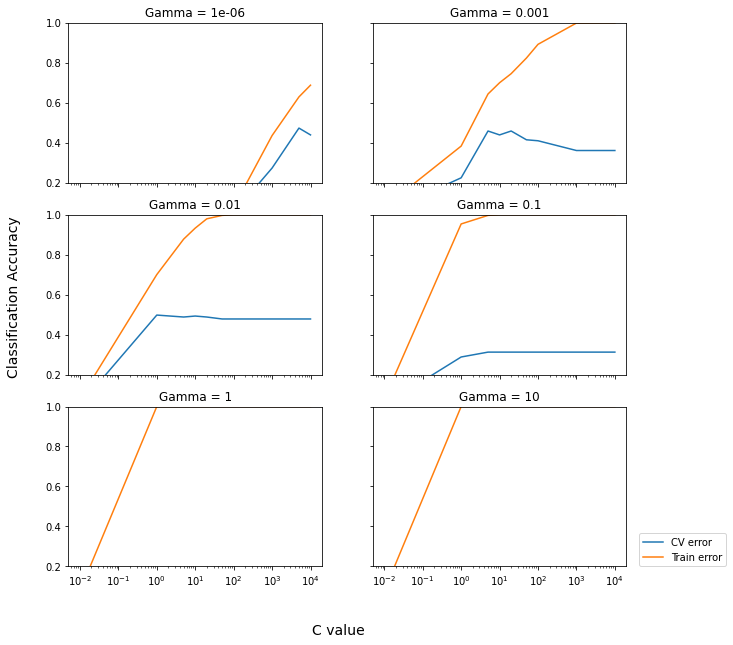

In [36]:
#model selection takes a few minutes, change this variable
#to true to run the parameter loop
do_model_selection = True

if do_model_selection:
    C_range = np.array([.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000])
    gamma_range = np.array([0.000001, 0.001, 0.01, 0.1, 1, 10])
    
    fig, axes = plt.subplots(3, 2,
                     sharex='col', sharey='row',figsize=(10,10))
    plot_number = 0
    for outer_ind, gamma_value in enumerate(gamma_range):
        row = int(plot_number / 2)
        column = int(plot_number % 2)
        cv_errors = np.zeros(C_range.shape)
        train_errors = np.zeros(C_range.shape)
        for index, c_value in enumerate(C_range):
                                                     
            clf = SVC(C=c_value, gamma=gamma_value)
            clf.fit(X_train,Y_train)
                                                             
            train_conf = confusion_matrix(Y_train, clf.predict(X_train))
            cv_conf = confusion_matrix(Y_validation, clf.predict(X_validation))
                                                                     
            cv_errors[index] = accuracy(cv_conf)
            train_errors[index] = accuracy(train_conf)
                                                                             
        ax = axes[row, column]
        ax.set_title('Gamma = %g'%gamma_value)
        ax.semilogx(C_range, cv_errors, label='CV error')
        ax.semilogx(C_range, train_errors, label='Train error')
        plot_number += 1
        ax.set_ylim([0.2,1])
                                                                                             
    ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
    fig.text(0.5, 0.03, 'C value', ha='center',
             fontsize=14)
    
    fig.text(0.04, 0.5, 'Classification Accuracy', va='center',
             rotation='vertical', fontsize=14)

    plt.show()

In [37]:
from sklearn.svm import SVC
SVM = SVC(C=10, gamma=1e-6)
SVM.fit(X_train, Y_train)
predictions = SVM.predict(X_validation)

In [38]:
resultados(Y_validation,predictions)

Flow Pattern classification accuracy = 0.048780
Accuracy: 0.04878048780487805
F1 score: 0.0045377197958026095
Recall: 0.04878048780487805
Precision: 0.002379535990481856

 clasification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.05      1.00      0.09        10
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00        17
           9       0.00      0.00      0.00     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 

# 6 Algoritmo DL 

# Escalamiento del vector de características 

In [39]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(feature_vectors)
feature_vectors = scaler.transform(feature_vectors)

# Segmentación de los datos para entrenamiento y pruebas

In [41]:
from sklearn.model_selection import train_test_split
validation_size = 0.2
seed = 0
X_train, X_validation, Y_train, Y_validation = train_test_split(feature_vectors, labels, test_size=validation_size, random_state=seed)

# MLP

In [45]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(solver='lbfgs', alpha=.3,
                    hidden_layer_sizes=(1000), max_iter=10000
                   )
MLP.fit(X_train,Y_train)
predictions = MLP.predict(X_validation)

In [46]:
resultados(Y_validation,predictions)

Flow Pattern classification accuracy = 0.448780
Accuracy: 0.44878048780487806
F1 score: 0.45147179349337996
Recall: 0.44878048780487806
Precision: 0.48469203182666243

 clasification report:
               precision    recall  f1-score   support

           0       0.32      0.43      0.36        14
           1       0.22      0.50      0.30        10
          10       0.59      0.62      0.61        16
          11       0.71      1.00      0.83        12
          12       0.26      0.33      0.29        15
          13       0.45      0.23      0.30        22
           2       0.33      0.36      0.35        11
           3       0.25      0.27      0.26        11
           4       0.40      0.36      0.38        11
           5       0.54      0.47      0.50        15
           6       0.62      0.44      0.52        18
           7       0.42      0.31      0.36        16
           8       0.53      0.53      0.53        17
           9       0.90      0.53      0.67        

# 7. RandomForest

# Escalamiento del vector de características 

In [47]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(feature_vectors)
feature_vectors = scaler.transform(feature_vectors)

# Segmentación de los datos para entrenamiento y pruebas

In [49]:
from sklearn.model_selection import train_test_split
validation_size = 0.2
seed = 0
X_train, X_validation, Y_train, Y_validation = train_test_split(feature_vectors, labels, test_size=validation_size, random_state=seed)

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
predictions = RF.predict(X_validation)

In [51]:
resultados(Y_validation, predictions)

Flow Pattern classification accuracy = 0.487805
Accuracy: 0.4878048780487805
F1 score: 0.47860604165442927
Recall: 0.4878048780487805
Precision: 0.505587901258633

 clasification report:
               precision    recall  f1-score   support

           0       0.47      0.50      0.48        14
           1       0.31      0.40      0.35        10
          10       0.67      0.50      0.57        16
          11       0.75      1.00      0.86        12
          12       0.44      0.47      0.45        15
          13       0.50      0.18      0.27        22
           2       0.29      0.36      0.32        11
           3       0.25      0.45      0.32        11
           4       0.57      0.36      0.44        11
           5       0.55      0.73      0.63        15
           6       0.41      0.50      0.45        18
           7       0.50      0.25      0.33        16
           8       0.62      0.59      0.61        17
           9       0.61      0.65      0.63        17



In [52]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    #'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    #'max_features': [2, 3],
    #'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
RF = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RF, param_grid = param_grid, verbose=10)

In [53]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START max_depth=80, n_estimators=100.............................
[CV 1/5; 1/16] END max_depth=80, n_estimators=100;, score=0.476 total time=   0.7s
[CV 2/5; 1/16] START max_depth=80, n_estimators=100.............................
[CV 2/5; 1/16] END max_depth=80, n_estimators=100;, score=0.537 total time=   0.7s
[CV 3/5; 1/16] START max_depth=80, n_estimators=100.............................
[CV 3/5; 1/16] END max_depth=80, n_estimators=100;, score=0.460 total time=   0.7s
[CV 4/5; 1/16] START max_depth=80, n_estimators=100.............................
[CV 4/5; 1/16] END max_depth=80, n_estimators=100;, score=0.515 total time=   0.7s
[CV 5/5; 1/16] START max_depth=80, n_estimators=100.............................
[CV 5/5; 1/16] END max_depth=80, n_estimators=100;, score=0.472 total time=   0.7s
[CV 1/5; 2/16] START max_depth=80, n_estimators=200.............................
[CV 1/5; 2/16] END max_depth=80, n_est

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [80, 90, 100, 110],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=10)

In [54]:
print(grid_search.best_params_,grid_search.best_score_)

{'max_depth': 110, 'n_estimators': 100} 0.5066736495585814


In [55]:
predictions = grid_search.predict(X_validation)

In [56]:
resultados(Y_validation, predictions)

Flow Pattern classification accuracy = 0.492683
Accuracy: 0.4926829268292683
F1 score: 0.48241746452583356
Recall: 0.4926829268292683
Precision: 0.505674560783675

 clasification report:
               precision    recall  f1-score   support

           0       0.50      0.64      0.56        14
           1       0.40      0.40      0.40        10
          10       0.64      0.56      0.60        16
          11       0.75      1.00      0.86        12
          12       0.53      0.67      0.59        15
          13       0.50      0.18      0.27        22
           2       0.23      0.27      0.25        11
           3       0.20      0.27      0.23        11
           4       0.67      0.36      0.47        11
           5       0.42      0.67      0.51        15
           6       0.40      0.44      0.42        18
           7       0.36      0.25      0.30        16
           8       0.71      0.59      0.65        17
           9       0.65      0.65      0.65        17



# 8. Desicion Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
predictions =DT.predict(X_validation)

In [58]:
resultados(Y_validation,predictions)

Flow Pattern classification accuracy = 0.360976
Accuracy: 0.36097560975609755
F1 score: 0.3621174904000991
Recall: 0.36097560975609755
Precision: 0.38350352023235806

 clasification report:
               precision    recall  f1-score   support

           0       0.42      0.36      0.38        14
           1       0.29      0.50      0.37        10
          10       0.44      0.25      0.32        16
          11       0.79      0.92      0.85        12
          12       0.33      0.33      0.33        15
          13       0.45      0.23      0.30        22
           2       0.33      0.36      0.35        11
           3       0.05      0.09      0.06        11
           4       0.31      0.36      0.33        11
           5       0.38      0.53      0.44        15
           6       0.33      0.33      0.33        18
           7       0.07      0.06      0.07        16
           8       0.38      0.29      0.33        17
           9       0.67      0.59      0.62        1

# Ejercicio

Realizar optimización de parametros sobre DT

In [1]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

X = X_train
y = Y_train

std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

n_components = list(range(1,X.shape[1]+1,1))

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)


NameError: ignored

# Evaluación inicial del compartamiento de cada uno de los modelos

In [59]:
seed = 42
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('MLP', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).


LR: 0.412451 (0.063374)
LDA: 0.466411 (0.033896)
KNN: 0.319377 (0.042245)
NB: 0.314694 (0.040114)
SVM: 0.452951 (0.039455)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

MLP: 0.407558 (0.046651)
RF: 0.499563 (0.060076)
DT: 0.359846 (0.020355)


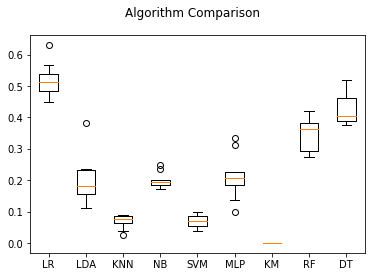

In [ ]:
# Compare Algorithms Accuracy
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 9. Deep Learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
one_hot_labels_train = keras.utils.to_categorical(Y_train, num_classes=14)
one_hot_labels_validation = keras.utils.to_categorical(Y_validation, num_classes=14)

In [ ]:
one_hot_labels_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 200)               25800     
                                                                 
 dense_3 (Dense)             (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 14)                910       
                                                                 
Total params: 54,358
Trainable params: 54,358
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
9/9 [==============================]

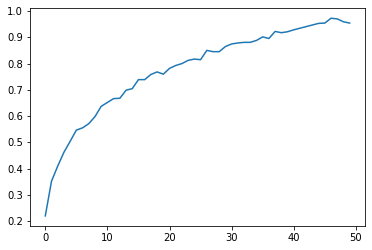

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',))
model.add(Dense(200, activation='relu',))
#model.add(Dense(200, activation='relu',))
model.add(Dense(64, activation='relu',))
#model.add(Dense(100, activation='relu',))
#model.add(Dense(8000, activation='relu',))
#model.add(Dropout(0.5))
#model.add(Dense(1000, activation='tanh',))
#model.add(Dense(100, activation='relu',))
model.add(Dense(14, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc', 'mse','mae','mape'])  

# summarize layers
print(model.summary())

# Convert labels to categorical one-hot encoding
#one_hot_labels_train = keras.utils.to_categorical(Y_train, num_classes=14)

# Train the model, iterating on the data in batches of 32 samples
history=model.fit(X_train, one_hot_labels_train, epochs=50, batch_size=100)
#plt.subplot(2,2,1)
plt.plot(history.history['acc'])
#plt.subplot(2,2,2)
#plt.plot(history.history['mse'])
#plt.subplot(2,2,3)
#plt.plot(history.history['mae'])
#plt.subplot(2,2,4)
#plt.plot(history.history['mape'])
plt.show()

In [ ]:
score = model.evaluate(X_validation, one_hot_labels_validation, batch_size=64)
score

4/4 [==============================] - 0s 6ms/step - loss: 6.7164 - acc: 0.3317 - mse: 0.0739 - mae: 0.0984 - mape: 49190184.0000


[6.716403484344482,
 0.3316831588745117,
 0.07389137148857117,
 0.09838036447763443,
 49190184.0]

# 10. Auto Machine Learning 

In [ ]:
# First install package from terminal:
#!pip install -U pip
#!pip install -U setuptools wheel
#!pip install autogluon  # autogluon==0.4.0

from autogluon.tabular import TabularDataset, TabularPredictor
train_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv')
test_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv')

In [ ]:
print(train_data.head())

   age   workclass  fnlwgt   education  education-num       marital-status  \
0   25     Private  178478   Bachelors             13        Never-married   
1   23   State-gov   61743     5th-6th              3        Never-married   
2   46     Private  376789     HS-grad              9        Never-married   
3   55           ?  200235     HS-grad              9   Married-civ-spouse   
4   36     Private  224541     7th-8th              4   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Tech-support       Own-child   White   Female             0   
1    Transport-moving   Not-in-family   White     Male             0   
2       Other-service   Not-in-family   White     Male             0   
3                   ?         Husband   White     Male             0   
4   Handlers-cleaners         Husband   White     Male             0   

   capital-loss  hours-per-week  native-country   class  
0             0              40   United

In [ ]:
print(train_data.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  39073.000000  3.907300e+04   39073.000000  39073.000000  39073.000000   
mean      38.616743  1.899605e+05      10.078085   1117.146802     88.002866   
std       13.718529  1.055563e+05       2.569742   7701.078403    403.732117   
min       17.000000  1.349200e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.177740e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783410e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.383420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    39073.000000  
mean        40.407673  
std         12.362809  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [ ]:
predictor = TabularPredictor(label='class').fit(train_data, time_limit=120)  # Fit models for 120s

No path specified. Models will be saved in: "AutogluonModels/ag-20220409_173104/"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20220409_173104/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    39073
Train Data Columns: 14
Label Column: class
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [' <=50K', ' >50K']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 =  >50K, class 0 =  <=50K
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive ( >50K) vs negative ( <=50K) class.
	To explicitly set the positive_class, either rename classes to 1 

In [ ]:
performance = predictor.evaluate(test_data)

Evaluation: accuracy on test data: 0.8767529941652165
Evaluations on test data:
{
    "accuracy": 0.8767529941652165,
    "balanced_accuracy": 0.795126057397256,
    "mcc": 0.6406203577595788,
    "roc_auc": 0.9297192332441957,
    "f1": 0.7112709832134292,
    "precision": 0.800755939524838,
    "recall": 0.6397756686798964
}


In [ ]:
leaderboard = predictor.leaderboard(test_data)

                  model  score_test  score_val  pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2    0.876753     0.8864        1.392325       0.443720  71.705051                 0.059249                0.005404           1.351176            2       True         12
1              CatBoost    0.875627     0.8836        0.039340       0.025799  36.035641                 0.039340                0.025799          36.035641            1       True          7
2              LightGBM    0.873477     0.8824        0.370032       0.053497   1.951005                 0.370032                0.053497           1.951005            1       True          4
3            LightGBMXT    0.871430     0.8792        0.280367       0.075792   2.768765                 0.280367                0.075792           2.768765            1       True          3
4               XGBoost    0.868871     

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2     0.8864       0.443720  71.705051                0.005404           1.351176            2       True         12
1              CatBoost     0.8836       0.025799  36.035641                0.025799          36.035641            1       True          7
2              LightGBM     0.8824       0.053497   1.951005                0.053497           1.951005            1       True          4
3            LightGBMXT     0.8792       0.075792   2.768765                0.075792           2.768765            1       True          3
4               XGBoost     0.8720       0.027042   0.668326                0.027042           0.668326            1       True         11
5      RandomForestGini     0.8640       0.312669   9.969909                0.312669           9.969909 

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestGini': 'RFModel',
  'RandomForestEntr': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesGini': 'XTModel',
  'ExtraTreesEntr': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': 0.7752,
  'KNeighborsDist': 0.766,
  'LightGBMXT': 0.8792,
  'LightGBM': 0.8824,
  'RandomForestGini': 0.864,
  'RandomForestEntr': 0.8608,
  'CatBoost': 0.8836,
  'ExtraTreesGini': 0.8496,
  'ExtraTreesEntr': 0.8496,
  'NeuralNetFastAI': 0.8628,
  'XGBoost': 0.872,
  'WeightedEnsemble_L2': 0.8864},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': 'AutogluonModels/ag-20220408_043438/models/KNeighborsUnif/',
  'KNeighborsDist': 'AutogluonModels/ag-20220408_043438/models/KNeighborsDist/',
  'LightGBMXT': 'Autogluon

# Ejercicio 1
Probar multiples codificaciones incluida K-mers para probar sobre el archivo de prueba y mostrar el mejor resultado, adicional utilizar la operación grid search para realizar optimización de párametros

In [ ]:
#Ejercicio1


# Ejercicio 2

Tomar el base de datos de 11 tumores a partir de microarrays de expresión genica y clasificarlos con los algoritmos vistos en este notebook incluido optimización de páramteros

In [5]:
#Ejercicio2 - https://github.com/simonorozcoarias/ML_DL_microArrays 
import seaborn as sn; sn.set() 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode

from keras.layers import Dense
import matplotlib.pyplot as plt
from pandas import set_option
import pandas as pd
from keras.models import Sequential
import keras.utils
#from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn 
import keras
from keras.layers import Dense, Dropout, Activation
#from keras.optimizers import SGD
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
#from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.layers import Dense, Flatten, Conv1D

from keras.layers import Dropout
from keras.constraints import maxnorm



In [6]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [7]:
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

filename = '/content/drive/MyDrive/GitHub/BioNotebooks/Scripting/Programming/Tarea de microarrays de expresion genica/data11tumors2.csv'
training_data = pd.read_csv(filename)
training_data

,Class,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D12524,D12525,D12526,D12527,D12528,D12529,D12530,D12531,D12532,D12533
0,7,153,228,32,30,-36,48,984,-19,537,...,100,30,83,28,57,106,128,5,74,-188
1,7,154,99,43,55,66,63,5051,-26,1001,...,27,43,90,30,82,485,896,-2,91,-78
2,7,84,85,19,28,-104,28,2387,-80,1131,...,-32,51,110,10,86,62,76,-47,92,-103
3,7,234,169,40,36,81,6,2657,-6,1214,...,43,52,82,12,135,60,69,22,89,-180
4,7,104,58,42,13,107,5,3562,18,1464,...,159,42,73,1,82,60,50,30,74,-198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0,157,578,40,58,5,-49,57,-29,3306,...,4,45,64,37,169,91,180,-4,60,-142
170,0,286,882,110,-19,-142,-66,-5,23,2701,...,-91,130,137,-61,75,36,58,44,161,-433
171,0,579,667,55,-41,-98,-138,-164,-61,2812,...,-110,107,199,-60,59,8,77,-42,171,-371
172,0,252,582,88,3,44,-162,553,-150,2020,...,-66,92,-26,-44,148,43,73,0,201,-333


In [8]:
training_data.describe()

,Class,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D12524,D12525,D12526,D12527,D12528,D12529,D12530,D12531,D12532,D12533
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,4.425287,218.413793,537.942529,71.965517,83.706897,-67.155172,-16.568966,644.988506,76.609195,1472.890805,...,-1.327586,93.120690,138.028736,2.839080,97.948276,62.850575,102.396552,12.913793,206.942529,-220.873563
std,3.245743,117.290761,268.926376,43.827156,122.828468,141.340339,62.832499,1092.470272,863.362875,650.125888,...,96.165089,45.964957,67.895485,44.568288,95.784336,80.848968,127.692587,27.441552,402.505214,217.480811
min,0.000000,-122.000000,30.000000,-24.000000,-80.000000,-900.000000,-206.000000,-551.000000,-205.000000,23.000000,...,-235.000000,12.000000,-26.000000,-146.000000,-349.000000,-184.000000,-75.000000,-56.000000,37.000000,-992.000000
25%,2.000000,148.750000,360.000000,44.000000,24.250000,-129.750000,-58.000000,-32.250000,-67.750000,1060.250000,...,-54.750000,59.250000,92.250000,-20.500000,46.000000,16.000000,20.500000,-4.000000,96.000000,-332.500000
50%,4.000000,210.500000,520.500000,65.000000,65.000000,-43.500000,-15.000000,146.000000,-35.500000,1427.500000,...,-5.500000,87.500000,131.500000,7.000000,113.000000,43.000000,73.500000,10.000000,142.000000,-208.500000
75%,7.000000,281.750000,706.750000,87.750000,111.000000,26.500000,23.000000,838.750000,-3.750000,1774.500000,...,41.000000,118.750000,169.500000,33.500000,155.500000,96.750000,145.000000,25.500000,210.500000,-142.000000
max,10.000000,616.000000,1419.000000,247.000000,1307.000000,264.000000,138.000000,5218.000000,10019.000000,4120.000000,...,452.000000,270.000000,414.000000,100.000000,480.000000,485.000000,896.000000,109.000000,4888.000000,1351.000000


In [9]:
print(training_data.groupby('Class').size())

Class
0     27
1      8
2     26
3     23
4     12
      ..
6      7
7     26
8      6
9     14
10    14
Length: 11, dtype: int64


In [10]:
label_vectors = training_data['Class'].values
feature_vectors = training_data.drop(['Class'], axis=1).values

In [11]:
label_vectors

array([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,  2, 10,
        4,  3,  0,  6,  0,  0,  3,  2,  9, 10,  7,  7,  2,  2,  5,  2,  0,
        9,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  9, 10,  9, 10, 10,  9,
       10,  2,  2,  2,  2,  2,  2,  2,  2,  2,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0])

In [12]:
feature_vectors

array([[ 153,  228,   32, ...,    5,   74, -188],
       [ 154,   99,   43, ...,   -2,   91,  -78],
       [  84,   85,   19, ...,  -47,   92, -103],
       ...,
       [ 579,  667,   55, ...,  -42,  171, -371],
       [ 252,  582,   88, ...,    0,  201, -333],
       [  83,  420,   14, ...,   12,   80, -180]])

In [13]:
scaler = preprocessing.StandardScaler().fit(feature_vectors)
feature_vectors_scaler = scaler.transform(feature_vectors)

In [14]:
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(feature_vectors, label_vectors, 
                                                                test_size=validation_size, random_state=seed)

In [15]:
X_train.shape

(139, 12533)

In [16]:
validation_size = 0.2
seed = 7
X_trainScaler, X_validationScaler, Y_trainScaler, Y_validationScaler = train_test_split(feature_vectors_scaler, label_vectors, 
                                                                                        test_size=validation_size, 
                                                                                        random_state=seed)

In [17]:
pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(X_train)
X_trainPCA = pca.transform(X_train)
X_validationPCA=pca.transform(X_validation)

In [18]:
print('X_PCA:',X_trainPCA.shape)

X_PCA: (139, 83)


In [19]:
pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(feature_vectors)
feature_vectorsPCA = pca.transform(feature_vectors)

pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(feature_vectors_scaler)
feature_vectorsPCA_Scaler = pca.transform(feature_vectors_scaler)

pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(X_trainScaler)
X_trainPCAScaler = pca.transform(X_trainScaler)
X_validationPCAScaler=pca.transform(X_validationScaler)

In [20]:
print('X_PCA:',X_trainPCAScaler.shape)

X_PCA: (139, 113)


In [26]:
def metrics(Y_validation,predictions):
    print('Accuracy:', accuracy_score(Y_validation, predictions))
    print('F1 score:', f1_score(Y_validation, predictions,average='weighted'))
    print('Recall:', recall_score(Y_validation, predictions,average='weighted'))
    print('Precision:', precision_score(Y_validation, predictions, average='weighted'))
    print('\n clasification report:\n', classification_report(Y_validation, predictions))

In [22]:
#Testing different quantities of neighbors
limit=100
x=[x for x in range(1,limit)]
yValidation=[0 for x in range(1,limit)]
ytrain=[0 for x in range(1,limit)]
yValidationScaler=[0 for x in range(1,limit)]
ytrainScaler=[0 for x in range(1,limit)]
yValidationPCA=[0 for x in range(1,limit)]
ytrainPCA=[0 for x in range(1,limit)]
yValidationPCAScaler=[0 for x in range(1,limit)]
ytrainPCAScaler=[0 for x in range(1,limit)]
for i in range(1,limit):
    KNN = KNeighborsClassifier(n_neighbors=i)
    
    KNN.fit(X_train, Y_train)
    trainScore=KNN.score(X_train,Y_train)
    validationScore=KNN.score(X_validation,Y_validation)
    
    KNN.fit(X_trainScaler, Y_trainScaler)
    trainScoreScaler=KNN.score(X_trainScaler,Y_trainScaler)
    validationScoreScaler=KNN.score(X_validationScaler,Y_validationScaler)
    
    KNN.fit(X_trainPCA, Y_train)
    trainScorePCA=KNN.score(X_trainPCA,Y_train)
    validationScorePCA=KNN.score(X_validationPCA,Y_validation)
    
    KNN.fit(X_trainPCAScaler, Y_trainScaler)
    trainScorePCAScaler=KNN.score(X_trainPCAScaler,Y_trainScaler)
    validationScorePCAScaler=KNN.score(X_validationPCAScaler,Y_validationScaler)
    
    print('KNN Score:',i)
    ytrain[i-1]=trainScore   
    yValidation[i-1]=validationScore
    
    ytrainScaler[i-1]=trainScoreScaler   
    yValidationScaler[i-1]=validationScoreScaler
    
    ytrainPCA[i-1]=trainScorePCA   
    yValidationPCA[i-1]=validationScorePCA
    
    ytrainPCAScaler[i-1]=trainScorePCAScaler   
    yValidationPCAScaler[i-1]=validationScorePCAScaler
    

KNN Score: 1
KNN Score: 2
KNN Score: 3
KNN Score: 4
KNN Score: 5
KNN Score: 6
KNN Score: 7
KNN Score: 8
KNN Score: 9
KNN Score: 10
KNN Score: 11
KNN Score: 12
KNN Score: 13
KNN Score: 14
KNN Score: 15
KNN Score: 16
KNN Score: 17
KNN Score: 18
KNN Score: 19
KNN Score: 20
KNN Score: 21
KNN Score: 22
KNN Score: 23
KNN Score: 24
KNN Score: 25
KNN Score: 26
KNN Score: 27
KNN Score: 28
KNN Score: 29
KNN Score: 30
KNN Score: 31
KNN Score: 32
KNN Score: 33
KNN Score: 34
KNN Score: 35
KNN Score: 36
KNN Score: 37
KNN Score: 38
KNN Score: 39
KNN Score: 40
KNN Score: 41
KNN Score: 42
KNN Score: 43
KNN Score: 44
KNN Score: 45
KNN Score: 46
KNN Score: 47
KNN Score: 48
KNN Score: 49
KNN Score: 50
KNN Score: 51
KNN Score: 52
KNN Score: 53
KNN Score: 54
KNN Score: 55
KNN Score: 56
KNN Score: 57
KNN Score: 58
KNN Score: 59
KNN Score: 60
KNN Score: 61
KNN Score: 62
KNN Score: 63
KNN Score: 64
KNN Score: 65
KNN Score: 66
KNN Score: 67
KNN Score: 68
KNN Score: 69
KNN Score: 70
KNN Score: 71
KNN Score: 72
K

In [27]:
KNN = KNeighborsClassifier(n_neighbors=x[yValidation.index(max(yValidation))])
KNN.fit(X_trainPCA, Y_train)
predictions = KNN.predict(X_validationPCA)
metrics(Y_validation,predictions)

Accuracy: 0.8285714285714286
F1 score: 0.7910946196660481
Recall: 0.8285714285714286
Precision: 0.8133333333333334

 clasification report:
               precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       1.00      1.00      1.00         1
           2       1.00      0.40      0.57         5
           3       0.75      1.00      0.86         6
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5
          10       0.83      1.00      0.91         5

    accuracy                           0.83        35
   macro avg       0.73      0.76      0.72        35
weighted avg       0.81      0.83      0.79        35



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 

In [28]:
#model selection takes a few minutes, change this variable
#to true to run the parameter loop
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

In [29]:
#Testing different values of C
limit=100
step=10
x=[x for x in range(0,int(limit/step)-1)]
yValidation=[0 for x in range(0,int(limit/step)-1)]
ytrain=[0 for x in range(0,int(limit/step)-1)]
yValidationScaler=[0 for x in range(0,int(limit/step)-1)]
ytrainScaler=[0 for x in range(0,int(limit/step)-1)]
yValidationPCA=[0 for x in range(0,int(limit/step)-1)]
ytrainPCA=[0 for x in range(0,int(limit/step)-1)]
yValidationPCAScaler=[0 for x in range(0,int(limit/step)-1)]
ytrainPCAScaler=[0 for x in range(0,int(limit/step)-1)]

i=step
index=0
while i<limit:
    svc = SVC(C=i, gamma=1e-6)
    
    svc.fit(X_train, Y_train)
    trainScore=svc.score(X_train,Y_train)
    validationScore=svc.score(X_validation,Y_validation)
    
    svc.fit(X_trainScaler, Y_trainScaler)
    trainScoreScaler=svc.score(X_trainScaler,Y_trainScaler)
    validationScoreScaler=svc.score(X_validationScaler,Y_validationScaler)
    
    svc.fit(X_trainPCA, Y_train)
    trainScorePCA=svc.score(X_trainPCA,Y_train)
    validationScorePCA=svc.score(X_validationPCA,Y_validation)
    
    svc.fit(X_trainPCAScaler, Y_trainScaler)
    trainScorePCAScaler=svc.score(X_trainPCAScaler,Y_trainScaler)
    validationScorePCAScaler=svc.score(X_validationPCAScaler,Y_validationScaler)
    
    ytrain[index]=trainScore   
    yValidation[index]=validationScore
    
    ytrainScaler[index]=trainScoreScaler   
    yValidationScaler[index]=validationScoreScaler
    
    ytrainPCA[index]=trainScorePCA   
    yValidationPCA[index]=validationScorePCA
    
    ytrainPCAScaler[index]=trainScorePCAScaler   
    yValidationPCAScaler[index]=validationScorePCAScaler
    
    print('ite:',i)
    
    x[index]=i
    i+=step
    index+=1

ite: 10
ite: 20
ite: 30
ite: 40
ite: 50
ite: 60
ite: 70
ite: 80
ite: 90


In [30]:
svc = SVC(C=x[yValidationScaler.index(max(yValidationScaler))],gamma=1e-6)
svc.fit(X_trainScaler, Y_trainScaler)
predictions = svc.predict(X_validationScaler)
metrics(Y_validationScaler,predictions)

Accuracy: 0.9428571428571428
F1 score: 0.9333333333333335
Recall: 0.9428571428571428
Precision: 0.9285714285714286

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5
           8       0.50      1.00      0.67         1
           9       0.80      0.80      0.80         5
          10       1.00      1.00      1.00         5

    accuracy                           0.94        35
   macro avg       0.85      0.89      0.86        35
weighted avg       0.93      0.94      0.93        35



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 

In [31]:
#Testing different values of C
limit=1
step=0.1
x=[0 for x in range(0,int(limit/step))]
yValidation=[0 for x in range(0,int(limit/step))]
ytrain=[0 for x in range(0,int(limit/step))]
yValidationScaler=[0 for x in range(0,int(limit/step))]
ytrainScaler=[0 for x in range(0,int(limit/step))]
yValidationPCA=[0 for x in range(0,int(limit/step))]
ytrainPCA=[0 for x in range(0,int(limit/step))]
yValidationPCAScaler=[0 for x in range(0,int(limit/step))]
ytrainPCAScaler=[0 for x in range(0,int(limit/step))]
i=step
index=0
while i<limit:
    lr = LogisticRegression(C=i)
    
    lr.fit(X_train, Y_train)
    trainScore=lr.score(X_train,Y_train)
    validationScore=lr.score(X_validation,Y_validation)
    
    lr.fit(X_trainScaler, Y_trainScaler)
    trainScoreScaler=lr.score(X_trainScaler,Y_trainScaler)
    validationScoreScaler=lr.score(X_validationScaler,Y_validationScaler)
    
    lr.fit(X_trainPCA, Y_train)
    trainScorePCA=lr.score(X_trainPCA,Y_train)
    validationScorePCA=lr.score(X_validationPCA,Y_validation)
    
    lr.fit(X_trainPCAScaler, Y_trainScaler)
    trainScorePCAScaler=lr.score(X_trainPCAScaler,Y_trainScaler)
    validationScorePCAScaler=lr.score(X_validationPCAScaler,Y_validationScaler)
    
    ytrain[index]=trainScore   
    yValidation[index]=validationScore
    
    ytrainScaler[index]=trainScoreScaler   
    yValidationScaler[index]=validationScoreScaler
    
    ytrainPCA[index]=trainScorePCA   
    yValidationPCA[index]=validationScorePCA
    
    ytrainPCAScaler[index]=trainScorePCAScaler   
    yValidationPCAScaler[index]=validationScorePCAScaler
    
    print('ite:',i)
    
    x[index]=i
    i+=step
    index+=1 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


ite: 0.1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


ite: 0.2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


ite: 0.30000000000000004


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


ite: 0.4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


ite: 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


ite: 0.6


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


ite: 0.7


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


ite: 0.7999999999999999


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


ite: 0.8999999999999999


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


ite: 0.9999999999999999


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [32]:
lr = LogisticRegression(C=x[yValidation.index(max(yValidation))])
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
metrics(Y_validation,predictions)

Accuracy: 1.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
limit=100
n_features=80
step=10
x=[[[[w for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
yValidation=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
ytrain=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
yValidationScaler=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
ytrainScaler=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
yValidationPCA=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
ytrainPCA=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
yValidationPCAScaler=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
ytrainPCAScaler=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
indexi = 0
indexj = 0
indexk = 0
indexl = 0
for i in range(1,limit,step):
    indexj = 0
    for j in range(1,limit,step):
        indexk = 0
        for k in range(10,limit+10,step):
            indexl = 0
            for l in range(10,n_features,step):
                # 
                RF = RandomForestClassifier(n_estimators=i, max_depth=j, min_samples_split=k, max_features=l, n_jobs=4)

                RF.fit(X_train, Y_train)
                trainScore = RF.score(X_train, Y_train)
                validationScore = RF.score(X_validation,Y_validation)

                RF.fit(X_trainScaler, Y_trainScaler)
                trainScoreScaler=RF.score(X_trainScaler,Y_trainScaler)
                validationScoreScaler=RF.score(X_validationScaler,Y_validationScaler)

                RF.fit(X_trainPCA, Y_train)
                trainScorePCA=RF.score(X_trainPCA,Y_train)
                validationScorePCA=RF.score(X_validationPCA,Y_validation)

                RF.fit(X_trainPCAScaler, Y_trainScaler)
                trainScorePCAScaler=RF.score(X_trainPCAScaler,Y_trainScaler)
                validationScorePCAScaler=RF.score(X_validationPCAScaler,Y_validationScaler)
                
                # print("%d,%d,%d,%d"%(indexi,indexj,indexk,indexl))
                ytrain[indexi][indexj][indexk][indexl]=trainScore   
                yValidation[indexi][indexj][indexk][indexl]=validationScore

                ytrainScaler[indexi][indexj][indexk][indexl]=trainScoreScaler   
                yValidationScaler[indexi][indexj][indexk][indexl]=validationScoreScaler

                ytrainPCA[indexi][indexj][indexk][indexl]=trainScorePCA   
                yValidationPCA[indexi][indexj][indexk][indexl]=validationScorePCA

                ytrainPCAScaler[indexi][indexj][indexk][indexl]=trainScorePCAScaler   
                yValidationPCAScaler[indexi][indexj][indexk][indexl]=validationScorePCAScaler
                indexl += 1
            indexk += 1
        indexj += 1
    indexi += 1
    print('n_estimators:',i)

n_estimators: 1
n_estimators: 11
n_estimators: 21
n_estimators: 31
n_estimators: 41


In [ ]:
indexes = [0 for x in range(16)]
bestdata = 0.0
bestscaling = 0.0
bestpca = 0.0
bestpcascaling = 0.0
for i in range(len(yValidation)):
    for j in range(len(yValidation[i])):
        for k in range(len(yValidation[i][j])):
            for l in range(len(yValidation[i][j][k])):
                if yValidation[i][j][k][l] >= bestdata:
                    bestdata = yValidation[i][j][k][l]
                    indexes[0] = i
                    indexes[1] = j
                    indexes[2] = k
                    indexes[3] = l
                if yValidationScaler[i][j][k][l] >= bestscaling:
                    bestscaling = yValidationScaler[i][j][k][l]
                    indexes[4] = i
                    indexes[5] = j
                    indexes[6] = k
                    indexes[7] = l
                if yValidationPCA[i][j][k][l] >= bestpca:
                    bestpca = yValidationPCA[i][j][k][l]
                    indexes[8] = i
                    indexes[9] = j
                    indexes[10] = k
                    indexes[11] = l
                if yValidationPCAScaler[i][j][k][l] >= bestpcascaling:
                    bestpcascaling = yValidationPCAScaler[i][j][k][l]
                    indexes[12] = i
                    indexes[13] = j
                    indexes[14] = k
                    indexes[15] = l

print('The best score with data validation: ', bestdata,'with parameters: ',indexes[0], ', ', indexes[1], ', ', indexes[2], ', ', indexes[3])
print('The best score with data validation with Scaling: ', bestscaling,'with parameters: ',indexes[4], ', ', indexes[5], ', ', indexes[6], ', ', indexes[7])
print('The best score with data validation with PCA: ', bestpca,'with parameters: ',indexes[8], ', ', indexes[9], ', ', indexes[10], ', ', indexes[11])
print('The best score with data validation with Scaling and PCA: ', bestpcascaling,'with parameters: ',indexes[12], ', ', indexes[13], ', ', indexes[14], ', ', indexes[15])

In [ ]:
RF = RandomForestClassifier(n_estimators=81,  max_depth=91, min_samples_split=10, max_features=50
, n_jobs=4)
RF.fit(X_train, Y_train)
predictions = RF.predict(X_validation)
metrics(Y_validation,predictions)

In [ ]:
limit=100
n_features=80
step=10
x=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
yValidation=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
ytrain=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
yValidationScaler=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
ytrainScaler=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
yValidationPCA=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
ytrainPCA=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
yValidationPCAScaler=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
ytrainPCAScaler=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
indexi = 0
indexj = 0
indexk = 0
for i in range(1,limit,step):
    indexj = 0
    for j in range(10, limit+10,step):
        indexk = 0
        for k in range(10, n_features,step):
            DT = DecisionTreeClassifier(max_depth=i, min_samples_split=j, max_features=k)

            DT.fit(X_train, Y_train)
            trainScore = DT.score(X_train, Y_train)
            validationScore = DT.score(X_validation,Y_validation)

            DT.fit(X_trainScaler, Y_trainScaler)
            trainScoreScaler=DT.score(X_trainScaler,Y_trainScaler)
            validationScoreScaler=DT.score(X_validationScaler,Y_validationScaler)

            DT.fit(X_trainPCA, Y_train)
            trainScorePCA=DT.score(X_trainPCA,Y_train)
            validationScorePCA=DT.score(X_validationPCA,Y_validation)

            DT.fit(X_trainPCAScaler, Y_trainScaler)
            trainScorePCAScaler=DT.score(X_trainPCAScaler,Y_trainScaler)
            validationScorePCAScaler=DT.score(X_validationPCAScaler,Y_validationScaler)

            ytrain[indexi][indexj][indexk]=trainScore   
            yValidation[indexi][indexj][indexk]=validationScore

            ytrainScaler[indexi][indexj][indexk]=trainScoreScaler   
            yValidationScaler[indexi][indexj][indexk]=validationScoreScaler

            ytrainPCA[indexi][indexj][indexk]=trainScorePCA   
            yValidationPCA[indexi][indexj][indexk]=validationScorePCA

            ytrainPCAScaler[indexi][indexj][indexk]=trainScorePCAScaler   
            yValidationPCAScaler[indexi][indexj][indexk]=validationScorePCAScaler
            indexk += 1
        indexj += 1
    indexi += 1
    print('Depth: ',i)

In [ ]:
indexes = [0 for x in range(12)]
bestdata = 0.0
bestscaling = 0.0
bestpca = 0.0
bestpcascaling = 0.0
for i in range(len(yValidation)):
    for j in range(len(yValidation[i])):
        for k in range(len(yValidation[i][j])):
            if yValidation[i][j][k] >= bestdata:
                bestdata = yValidation[i][j][k]
                indexes[0] = i
                indexes[1] = j
                indexes[2] = k
            if yValidationScaler[i][j][k] >= bestscaling:
                bestscaling = yValidationScaler[i][j][k]
                indexes[3] = i
                indexes[4] = j
                indexes[5] = k
            if yValidationPCA[i][j][k] >= bestpca:
                bestpca = yValidationPCA[i][j][k]
                indexes[6] = i
                indexes[7] = j
                indexes[8] = k
            if yValidationPCAScaler[i][j][k] >= bestpcascaling:
                bestpcascaling = yValidationPCAScaler[i][j][k]
                indexes[9] = i
                indexes[10] = j
                indexes[11] = k
                    
print('The best score with data validation: ', bestdata,'with parameters: ',indexes[0], ', ', indexes[1], ', ', indexes[2])
print('The best score with data validation with Scaling: ', bestscaling,'with parameters: ',indexes[3], ', ', indexes[4], ', ', indexes[5])
print('The best score with data validation with PCA: ', bestpca,'with parameters: ',indexes[6], ', ', indexes[7], ', ', indexes[8])
print('The best score with data validation with Scaling and PCA: ', bestpcascaling,'with parameters: ',indexes[9], ', ', indexes[10], ', ', indexes[11])

In [ ]:
DT = DecisionTreeClassifier(max_depth=81, min_samples_split=10, max_features=30)
DT.fit(X_trainPCA, Y_train)
predictions = DT.predict(X_validationPCA)
metrics(Y_validation,predictions)

# Ejercicio 3

Tomar el base de datos de gioblastoma y clasificarlos con los algoritmos vistos en este notebook incluido optimización de páramteros

In [ ]:
#Ejercicio3 
import seaborn as sn; sn.set() 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode

from keras.layers import Dense
import matplotlib.pyplot as plt
from pandas import set_option
import pandas as pd
from keras.models import Sequential
import keras.utils
#from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn 
import keras
from keras.layers import Dense, Dropout, Activation
#from keras.optimizers import SGD
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
#from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.layers import Dense, Flatten, Conv1D

from keras.layers import Dropout
from keras.constraints import maxnorm



In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

filename = '/content/drive/MyDrive/GitHub/BioNotebooks/Scripting/Programming/Tarea de Gioblatoma/Data_Expression_mRNA_9classes.csv'
training_data = pd.read_csv(filename)
training_data

,Classes,gen1,gen2,gen3,gen4,gen5,gen6,gen7,gen8,gen9,...,gen2996,gen2997,gen2998,gen2999,gen3000,gen3001,gen3002,gen3003,gen3004,gen3005
0,1,0,0,0,3,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,3,1,0,2,2,2,2,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,3,1,6,4,1,2,1,0,5,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,9,1,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,1,2
4994,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2,0


In [ ]:
training_data.describe()

,Classes,gen1,gen2,gen3,gen4,gen5,gen6,gen7,gen8,gen9,...,gen2996,gen2997,gen2998,gen2999,gen3000,gen3001,gen3002,gen3003,gen3004,gen3005
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.00000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,3.514006,2.765306,2.827931,3.970788,4.295318,2.683874,3.149260,3.923770,2.410964,2.85034,...,0.693677,0.302921,0.800520,0.852541,0.499800,0.489596,0.283713,0.457383,0.348339,0.545418
std,2.108832,15.351552,15.632870,20.972874,23.376756,9.013659,13.078286,18.812813,7.135077,10.03827,...,9.214301,4.996965,8.445307,6.455933,6.564157,3.315356,1.754932,5.652721,4.522254,3.900791
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,822.000000,869.000000,1237.000000,1252.000000,271.000000,631.000000,986.000000,208.000000,397.00000,...,611.000000,327.000000,560.000000,410.000000,441.000000,206.000000,96.000000,376.000000,303.000000,242.000000


In [ ]:
print(training_data.groupby('Classes').size())

Classes
1    1126
2     361
3    1599
4     579
5     392
6     390
7     206
8     245
9     100
dtype: int64


In [ ]:
label_vectors = training_data['Classes'].values
feature_vectors = training_data.drop(['Classes'], axis=1).values

In [ ]:
label_vectors

array([1, 1, 1, ..., 9, 9, 9])

In [ ]:
feature_vectors

array([[0, 0, 0, ..., 0, 0, 1],
       [3, 1, 0, ..., 0, 0, 1],
       [3, 1, 6, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
scaler = preprocessing.StandardScaler().fit(feature_vectors)
feature_vectors_scaler = scaler.transform(feature_vectors)

In [ ]:
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(feature_vectors, label_vectors, 
                                                                test_size=validation_size, random_state=seed)

In [ ]:
X_train.shape

(3998, 3005)

In [ ]:
validation_size = 0.2
seed = 7
X_trainScaler, X_validationScaler, Y_trainScaler, Y_validationScaler = train_test_split(feature_vectors_scaler, label_vectors, 
                                                                                        test_size=validation_size, 
                                                                                        random_state=seed)

In [ ]:
pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(X_train)
X_trainPCA = pca.transform(X_train)
X_validationPCA=pca.transform(X_validation)

In [ ]:
print('X_PCA:',X_trainPCA.shape)

X_PCA: (3998, 7)


In [ ]:
pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(feature_vectors)
feature_vectorsPCA = pca.transform(feature_vectors)

pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(feature_vectors_scaler)
feature_vectorsPCA_Scaler = pca.transform(feature_vectors_scaler)

pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(X_trainScaler)
X_trainPCAScaler = pca.transform(X_trainScaler)
X_validationPCAScaler=pca.transform(X_validationScaler)

In [ ]:
print('X_PCA:',X_trainPCAScaler.shape)

X_PCA: (3998, 25)


In [ ]:
def metrics(Y_validation,predictions):
    print('Accuracy:', accuracy_score(Y_validation, predictions))
    print('F1 score:', f1_score(Y_validation, predictions,average='weighted'))
    print('Recall:', recall_score(Y_validation, predictions,average='weighted'))
    print('Precision:', precision_score(Y_validation, predictions, average='weighted'))
    print('\n clasification report:\n', classification_report(Y_validation, predictions))

In [ ]:
#Testing different quantities of neighbors
limit=100
x=[x for x in range(1,limit)]
yValidation=[0 for x in range(1,limit)]
ytrain=[0 for x in range(1,limit)]
yValidationScaler=[0 for x in range(1,limit)]
ytrainScaler=[0 for x in range(1,limit)]
yValidationPCA=[0 for x in range(1,limit)]
ytrainPCA=[0 for x in range(1,limit)]
yValidationPCAScaler=[0 for x in range(1,limit)]
ytrainPCAScaler=[0 for x in range(1,limit)]
for i in range(1,limit):
    KNN = KNeighborsClassifier(n_neighbors=i)
    
    KNN.fit(X_train, Y_train)
    trainScore=KNN.score(X_train,Y_train)
    validationScore=KNN.score(X_validation,Y_validation)
    
    KNN.fit(X_trainScaler, Y_trainScaler)
    trainScoreScaler=KNN.score(X_trainScaler,Y_trainScaler)
    validationScoreScaler=KNN.score(X_validationScaler,Y_validationScaler)
    
    KNN.fit(X_trainPCA, Y_train)
    trainScorePCA=KNN.score(X_trainPCA,Y_train)
    validationScorePCA=KNN.score(X_validationPCA,Y_validation)
    
    KNN.fit(X_trainPCAScaler, Y_trainScaler)
    trainScorePCAScaler=KNN.score(X_trainPCAScaler,Y_trainScaler)
    validationScorePCAScaler=KNN.score(X_validationPCAScaler,Y_validationScaler)
    
    print('KNN Score:',i)
    ytrain[i-1]=trainScore   
    yValidation[i-1]=validationScore
    
    ytrainScaler[i-1]=trainScoreScaler   
    yValidationScaler[i-1]=validationScoreScaler
    
    ytrainPCA[i-1]=trainScorePCA   
    yValidationPCA[i-1]=validationScorePCA
    
    ytrainPCAScaler[i-1]=trainScorePCAScaler   
    yValidationPCAScaler[i-1]=validationScorePCAScaler
    

KNN Score: 1
KNN Score: 2
KNN Score: 3
KNN Score: 4
KNN Score: 5
KNN Score: 6
KNN Score: 7
KNN Score: 8
KNN Score: 9
KNN Score: 10
KNN Score: 11
KNN Score: 12
KNN Score: 13
KNN Score: 14
KNN Score: 15
KNN Score: 16
KNN Score: 17
KNN Score: 18
KNN Score: 19
KNN Score: 20
KNN Score: 21
KNN Score: 22
KNN Score: 23
KNN Score: 24
KNN Score: 25
KNN Score: 26
KNN Score: 27
KNN Score: 28
KNN Score: 29
KNN Score: 30
KNN Score: 31
KNN Score: 32
KNN Score: 33
KNN Score: 34
KNN Score: 35
KNN Score: 36
KNN Score: 37
KNN Score: 38
KNN Score: 39
KNN Score: 40
KNN Score: 41
KNN Score: 42
KNN Score: 43
KNN Score: 44
KNN Score: 45
KNN Score: 46
KNN Score: 47
KNN Score: 48
KNN Score: 49
KNN Score: 50
KNN Score: 51
KNN Score: 52
KNN Score: 53
KNN Score: 54
KNN Score: 55
KNN Score: 56
KNN Score: 57
KNN Score: 58
KNN Score: 59
KNN Score: 60
KNN Score: 61
KNN Score: 62
KNN Score: 63
KNN Score: 64
KNN Score: 65
KNN Score: 66
KNN Score: 67
KNN Score: 68
KNN Score: 69
KNN Score: 70
KNN Score: 71
KNN Score: 72
K

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=x[yValidation.index(max(yValidation))])
KNN.fit(X_trainPCA, Y_train)
predictions = KNN.predict(X_validationPCA)
metrics(Y_validation,predictions)

Accuracy: 0.633
F1 score: 0.6197250031488751
Recall: 0.633
Precision: 0.6172034715293044

 clasification report:
               precision    recall  f1-score   support

           1       0.54      0.66      0.60       218
           2       0.31      0.16      0.21        76
           3       0.78      0.80      0.79       327
           4       0.85      0.85      0.85       110
           5       0.49      0.62      0.55        73
           6       0.52      0.49      0.51        85
           7       0.41      0.29      0.34        41
           8       0.51      0.53      0.52        43
           9       0.25      0.07      0.11        27

    accuracy                           0.63      1000
   macro avg       0.52      0.50      0.50      1000
weighted avg       0.62      0.63      0.62      1000



In [ ]:
#model selection takes a few minutes, change this variable
#to true to run the parameter loop
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

In [ ]:
#Testing different values of C
limit=100
step=10
x=[x for x in range(0,int(limit/step)-1)]
yValidation=[0 for x in range(0,int(limit/step)-1)]
ytrain=[0 for x in range(0,int(limit/step)-1)]
yValidationScaler=[0 for x in range(0,int(limit/step)-1)]
ytrainScaler=[0 for x in range(0,int(limit/step)-1)]
yValidationPCA=[0 for x in range(0,int(limit/step)-1)]
ytrainPCA=[0 for x in range(0,int(limit/step)-1)]
yValidationPCAScaler=[0 for x in range(0,int(limit/step)-1)]
ytrainPCAScaler=[0 for x in range(0,int(limit/step)-1)]

i=step
index=0
while i<limit:
    svc = SVC(C=i, gamma=1e-6)
    
    svc.fit(X_train, Y_train)
    trainScore=svc.score(X_train,Y_train)
    validationScore=svc.score(X_validation,Y_validation)
    
    svc.fit(X_trainScaler, Y_trainScaler)
    trainScoreScaler=svc.score(X_trainScaler,Y_trainScaler)
    validationScoreScaler=svc.score(X_validationScaler,Y_validationScaler)
    
    svc.fit(X_trainPCA, Y_train)
    trainScorePCA=svc.score(X_trainPCA,Y_train)
    validationScorePCA=svc.score(X_validationPCA,Y_validation)
    
    svc.fit(X_trainPCAScaler, Y_trainScaler)
    trainScorePCAScaler=svc.score(X_trainPCAScaler,Y_trainScaler)
    validationScorePCAScaler=svc.score(X_validationPCAScaler,Y_validationScaler)
    
    ytrain[index]=trainScore   
    yValidation[index]=validationScore
    
    ytrainScaler[index]=trainScoreScaler   
    yValidationScaler[index]=validationScoreScaler
    
    ytrainPCA[index]=trainScorePCA   
    yValidationPCA[index]=validationScorePCA
    
    ytrainPCAScaler[index]=trainScorePCAScaler   
    yValidationPCAScaler[index]=validationScorePCAScaler
    
    print('ite:',i)
    
    x[index]=i
    i+=step
    index+=1

ite: 10
ite: 20
ite: 30
ite: 40
ite: 50
ite: 60
ite: 70


In [ ]:
svc = SVC(C=x[yValidationScaler.index(max(yValidationScaler))],gamma=1e-6)
svc.fit(X_trainScaler, Y_trainScaler)
predictions = svc.predict(X_validationScaler)
metrics(Y_validationScaler,predictions)

In [ ]:
#Testing different values of C
limit=1
step=0.1
x=[0 for x in range(0,int(limit/step))]
yValidation=[0 for x in range(0,int(limit/step))]
ytrain=[0 for x in range(0,int(limit/step))]
yValidationScaler=[0 for x in range(0,int(limit/step))]
ytrainScaler=[0 for x in range(0,int(limit/step))]
yValidationPCA=[0 for x in range(0,int(limit/step))]
ytrainPCA=[0 for x in range(0,int(limit/step))]
yValidationPCAScaler=[0 for x in range(0,int(limit/step))]
ytrainPCAScaler=[0 for x in range(0,int(limit/step))]
i=step
index=0
while i<limit:
    lr = LogisticRegression(C=i)
    
    lr.fit(X_train, Y_train)
    trainScore=lr.score(X_train,Y_train)
    validationScore=lr.score(X_validation,Y_validation)
    
    lr.fit(X_trainScaler, Y_trainScaler)
    trainScoreScaler=lr.score(X_trainScaler,Y_trainScaler)
    validationScoreScaler=lr.score(X_validationScaler,Y_validationScaler)
    
    lr.fit(X_trainPCA, Y_train)
    trainScorePCA=lr.score(X_trainPCA,Y_train)
    validationScorePCA=lr.score(X_validationPCA,Y_validation)
    
    lr.fit(X_trainPCAScaler, Y_trainScaler)
    trainScorePCAScaler=lr.score(X_trainPCAScaler,Y_trainScaler)
    validationScorePCAScaler=lr.score(X_validationPCAScaler,Y_validationScaler)
    
    ytrain[index]=trainScore   
    yValidation[index]=validationScore
    
    ytrainScaler[index]=trainScoreScaler   
    yValidationScaler[index]=validationScoreScaler
    
    ytrainPCA[index]=trainScorePCA   
    yValidationPCA[index]=validationScorePCA
    
    ytrainPCAScaler[index]=trainScorePCAScaler   
    yValidationPCAScaler[index]=validationScorePCAScaler
    
    print('ite:',i)
    
    x[index]=i
    i+=step
    index+=1 

In [ ]:
lr = LogisticRegression(C=x[yValidation.index(max(yValidation))])
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
metrics(Y_validation,predictions)

In [ ]:
limit=100
n_features=80
step=10
x=[[[[w for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
yValidation=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
ytrain=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
yValidationScaler=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
ytrainScaler=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
yValidationPCA=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
ytrainPCA=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
yValidationPCAScaler=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
ytrainPCAScaler=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
indexi = 0
indexj = 0
indexk = 0
indexl = 0
for i in range(1,limit,step):
    indexj = 0
    for j in range(1,limit,step):
        indexk = 0
        for k in range(10,limit+10,step):
            indexl = 0
            for l in range(10,n_features,step):
                # 
                RF = RandomForestClassifier(n_estimators=i, max_depth=j, min_samples_split=k, max_features=l, n_jobs=4)

                RF.fit(X_train, Y_train)
                trainScore = RF.score(X_train, Y_train)
                validationScore = RF.score(X_validation,Y_validation)

                RF.fit(X_trainScaler, Y_trainScaler)
                trainScoreScaler=RF.score(X_trainScaler,Y_trainScaler)
                validationScoreScaler=RF.score(X_validationScaler,Y_validationScaler)

                RF.fit(X_trainPCA, Y_train)
                trainScorePCA=RF.score(X_trainPCA,Y_train)
                validationScorePCA=RF.score(X_validationPCA,Y_validation)

                RF.fit(X_trainPCAScaler, Y_trainScaler)
                trainScorePCAScaler=RF.score(X_trainPCAScaler,Y_trainScaler)
                validationScorePCAScaler=RF.score(X_validationPCAScaler,Y_validationScaler)
                
                # print("%d,%d,%d,%d"%(indexi,indexj,indexk,indexl))
                ytrain[indexi][indexj][indexk][indexl]=trainScore   
                yValidation[indexi][indexj][indexk][indexl]=validationScore

                ytrainScaler[indexi][indexj][indexk][indexl]=trainScoreScaler   
                yValidationScaler[indexi][indexj][indexk][indexl]=validationScoreScaler

                ytrainPCA[indexi][indexj][indexk][indexl]=trainScorePCA   
                yValidationPCA[indexi][indexj][indexk][indexl]=validationScorePCA

                ytrainPCAScaler[indexi][indexj][indexk][indexl]=trainScorePCAScaler   
                yValidationPCAScaler[indexi][indexj][indexk][indexl]=validationScorePCAScaler
                indexl += 1
            indexk += 1
        indexj += 1
    indexi += 1
    print('n_estimators:',i)

In [ ]:
indexes = [0 for x in range(16)]
bestdata = 0.0
bestscaling = 0.0
bestpca = 0.0
bestpcascaling = 0.0
for i in range(len(yValidation)):
    for j in range(len(yValidation[i])):
        for k in range(len(yValidation[i][j])):
            for l in range(len(yValidation[i][j][k])):
                if yValidation[i][j][k][l] >= bestdata:
                    bestdata = yValidation[i][j][k][l]
                    indexes[0] = i
                    indexes[1] = j
                    indexes[2] = k
                    indexes[3] = l
                if yValidationScaler[i][j][k][l] >= bestscaling:
                    bestscaling = yValidationScaler[i][j][k][l]
                    indexes[4] = i
                    indexes[5] = j
                    indexes[6] = k
                    indexes[7] = l
                if yValidationPCA[i][j][k][l] >= bestpca:
                    bestpca = yValidationPCA[i][j][k][l]
                    indexes[8] = i
                    indexes[9] = j
                    indexes[10] = k
                    indexes[11] = l
                if yValidationPCAScaler[i][j][k][l] >= bestpcascaling:
                    bestpcascaling = yValidationPCAScaler[i][j][k][l]
                    indexes[12] = i
                    indexes[13] = j
                    indexes[14] = k
                    indexes[15] = l

print('The best score with data validation: ', bestdata,'with parameters: ',indexes[0], ', ', indexes[1], ', ', indexes[2], ', ', indexes[3])
print('The best score with data validation with Scaling: ', bestscaling,'with parameters: ',indexes[4], ', ', indexes[5], ', ', indexes[6], ', ', indexes[7])
print('The best score with data validation with PCA: ', bestpca,'with parameters: ',indexes[8], ', ', indexes[9], ', ', indexes[10], ', ', indexes[11])
print('The best score with data validation with Scaling and PCA: ', bestpcascaling,'with parameters: ',indexes[12], ', ', indexes[13], ', ', indexes[14], ', ', indexes[15])

In [ ]:
RF = RandomForestClassifier(n_estimators=81,  max_depth=91, min_samples_split=10, max_features=50
, n_jobs=4)
RF.fit(X_train, Y_train)
predictions = RF.predict(X_validation)
metrics(Y_validation,predictions)

In [ ]:
limit=100
n_features=80
step=10
x=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
yValidation=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
ytrain=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
yValidationScaler=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
ytrainScaler=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
yValidationPCA=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
ytrainPCA=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
yValidationPCAScaler=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
ytrainPCAScaler=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
indexi = 0
indexj = 0
indexk = 0
for i in range(1,limit,step):
    indexj = 0
    for j in range(10, limit+10,step):
        indexk = 0
        for k in range(10, n_features,step):
            DT = DecisionTreeClassifier(max_depth=i, min_samples_split=j, max_features=k)

            DT.fit(X_train, Y_train)
            trainScore = DT.score(X_train, Y_train)
            validationScore = DT.score(X_validation,Y_validation)

            DT.fit(X_trainScaler, Y_trainScaler)
            trainScoreScaler=DT.score(X_trainScaler,Y_trainScaler)
            validationScoreScaler=DT.score(X_validationScaler,Y_validationScaler)

            DT.fit(X_trainPCA, Y_train)
            trainScorePCA=DT.score(X_trainPCA,Y_train)
            validationScorePCA=DT.score(X_validationPCA,Y_validation)

            DT.fit(X_trainPCAScaler, Y_trainScaler)
            trainScorePCAScaler=DT.score(X_trainPCAScaler,Y_trainScaler)
            validationScorePCAScaler=DT.score(X_validationPCAScaler,Y_validationScaler)

            ytrain[indexi][indexj][indexk]=trainScore   
            yValidation[indexi][indexj][indexk]=validationScore

            ytrainScaler[indexi][indexj][indexk]=trainScoreScaler   
            yValidationScaler[indexi][indexj][indexk]=validationScoreScaler

            ytrainPCA[indexi][indexj][indexk]=trainScorePCA   
            yValidationPCA[indexi][indexj][indexk]=validationScorePCA

            ytrainPCAScaler[indexi][indexj][indexk]=trainScorePCAScaler   
            yValidationPCAScaler[indexi][indexj][indexk]=validationScorePCAScaler
            indexk += 1
        indexj += 1
    indexi += 1
    print('Depth: ',i)

In [ ]:
indexes = [0 for x in range(12)]
bestdata = 0.0
bestscaling = 0.0
bestpca = 0.0
bestpcascaling = 0.0
for i in range(len(yValidation)):
    for j in range(len(yValidation[i])):
        for k in range(len(yValidation[i][j])):
            if yValidation[i][j][k] >= bestdata:
                bestdata = yValidation[i][j][k]
                indexes[0] = i
                indexes[1] = j
                indexes[2] = k
            if yValidationScaler[i][j][k] >= bestscaling:
                bestscaling = yValidationScaler[i][j][k]
                indexes[3] = i
                indexes[4] = j
                indexes[5] = k
            if yValidationPCA[i][j][k] >= bestpca:
                bestpca = yValidationPCA[i][j][k]
                indexes[6] = i
                indexes[7] = j
                indexes[8] = k
            if yValidationPCAScaler[i][j][k] >= bestpcascaling:
                bestpcascaling = yValidationPCAScaler[i][j][k]
                indexes[9] = i
                indexes[10] = j
                indexes[11] = k
                    
print('The best score with data validation: ', bestdata,'with parameters: ',indexes[0], ', ', indexes[1], ', ', indexes[2])
print('The best score with data validation with Scaling: ', bestscaling,'with parameters: ',indexes[3], ', ', indexes[4], ', ', indexes[5])
print('The best score with data validation with PCA: ', bestpca,'with parameters: ',indexes[6], ', ', indexes[7], ', ', indexes[8])
print('The best score with data validation with Scaling and PCA: ', bestpcascaling,'with parameters: ',indexes[9], ', ', indexes[10], ', ', indexes[11])

In [ ]:
DT = DecisionTreeClassifier(max_depth=81, min_samples_split=10, max_features=30)
DT.fit(X_trainPCA, Y_train)redictions = DT.predict(X_validationPCA)
metrics(Y_validation,predictions)

# Ejercicio 4
Utilizar autoglon (auto Machine learning) para la base de datos de LTR en una codifiación particular

In [ ]:
#Ejercicio4